# Preâmbulo
Inteligência artificial, aprendizagem de máquina e estatística são campos fundamentalmente entrelaçados, assim sendo, antes de tratar de processos de classificão propriamente ditos devemos relembrar de alguns conceitos fundamentais de estatística para verdadeiramente compreender  os algoritmos tratados adiante.

## Medidas de Posição
* Média
* Mediana
* Moda
* Percentis

O objetivo de um algoritmo de ML é fazer uma predição mais fundamentada do que um mero chute. Uma das formas mais rudimentares de fazer isso é através da média. Observe o código à seguir.

# Técnicas de Classificação
Os algoritmos de aprendizagem de máquina são comumente dívididos em duas famílias: algoritmos de aprendizagem _supervisionada_ e de aprendizagem _não-supervisionada_. Antes de passarmos ao estudo dos algoritmos de classificação propriamente ditos, é preciso compreender alguns conceitos relacionados a essas diferenças, e para isso vamos recorrer a um exemplo.

Imagine que em uma academia de esportes os novos clientes passam por testes físicos para definir a sua afinidade esportiva. Primeiramente, os examinados são submetidos a uma corrida de 100m, e o tempo em segundos é inserido na base de dados como `var1`. Em seguinda, os examinados precisam correr uma longa distância e o tempo em segundos é inserido na base de dados como `var2`. Por fim, os candidatos precisam levantar pesos, e o peso máximo levantado em kgs é inserido na base de dados como `var3`. Perceba que esses dados por si só não têm capacidade de indicar a afinidade esportiva de um candidato.

Almejando obter mais informação sobre os examinados, um profissional de educação física sugere renomear as colunas `var1`, `var2` e `var3` para `velocidade`, `resistência` e `força`, respectivamente. Além disso, foi criada uma variável nova, chamada `aptidao`, onde cada observação poderia receber uma das seguintes categorias `atletismo`, `futebol`, `fisiculturismo`, e o profissional atribuiu à cada cliente uma categoria com base nos seus resultados.

Note que ao fazer isso foi introduzido significado para as variáveis, possibilitando a análise da variável `aptidao` em _relação às demais_. Essa variável `aptidao` é a etiqueta (ou label) dos dados para o problema posto. Note que a etiqueta de um conjunto de dados depende do problema a ser resolvido, e um mesmo conjunto pode ser considerado etiquetado, ou não, dependendo do que se deseja analisar.

Fundamentalmente os algorítmos de aprendizagem não supervisionada se preocupam com tarefas de _agrupamento_, _etiquetagem_, e de _redução de dimensionalidade_ aplicados em dados não etiquetados, habitualmente empregados em uma fase preparatória, anterior à aplicação de algoritmos de aprendizagem supervisionada.

Os algoritmos de aprendizagem supervisionada, por sua vez, são empregados para resolver dois tipos de problema: __regressão__ e __classificação__.

Os algoritmos de regressão se encarregam de receber dados e fornecer uma variável contínua (um número real) como saída. Por exemplo, dado que o cliente x correu 100m em 20 segundos, ele é estimado a correr a longa distância em x segundos. O algoritmo mais conhecido dessa família é a regressão linear.

Por sua vez, os algoritmos de classificação se ocupam das variáveis categóricas discretas, um estado dentre um número finito de possibilidades. Por exemplo, dado os resultados das outras variáveis, o melhor esporte para o cliente é: `fisiculturismo`. Um algoritmo bastante conhecido dessa família é a árvore de decisão.

Nesta apresentação serão abordados os seguintes algoritmos de classificação:
* Regressão Logística
* Support Vector Machine (SVM)
* Árvore de Decisão (Decision Tree)
* Floresta Aleatória (Random Forest)


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [73]:
# Criando uma base de dados com 100 linhas e 2 colunas, e valores variando entre 0 e 1
df_pre = pd.DataFrame(np.random.normal(0, 1, size=(100, 2)), columns=['x1', 'x2'])
# Tentando prever os valores de x2 através de chutes aleatórios e armazenndo os resultados em uma nova coluna 'chute'
df_pre["chute"] = np.random.default_rng().uniform(-2, 2, size=(100))
# Tentando prever os valores de x2 utilizando a média e armazenando os resultados em uma nova coluna 'media'
df_pre["media"] = 0
df_pre.head()

,x1,x2,chute,media
0,0.173449,-0.771305,1.218167,0
1,0.360495,1.335099,-1.538748,0
2,-0.112940,-1.474913,-0.325749,0
3,0.530341,0.465255,1.139397,0
4,0.985048,1.602929,1.844698,0


Para avaliar a acurácia da nossa predição, calculamos o erro quadrado médio (mean squared error, MSE) entre os resultados reais e as nosssas predições. O cálculo é simples, para um ponto, verificamos a diferença entre a predição e o resultado real e elevamos ao quadrado. Este é o erro quadrado daquele ponto. O erro quadrado médio do modelo consiste na média da soma dos quadrados das diferenças entre os resultados reais e os resultados preditos, divididos pelo tamanho da amostra. Em matematiquês:
$$MSE=\frac{1}{N}\sum_{i=1}^n(Y_i-\hat{Y}_i)^2$$

Usamos a função `mean_squared_error()` da biblioteca scikit_learn para calcular o MSE do nosso modelo.

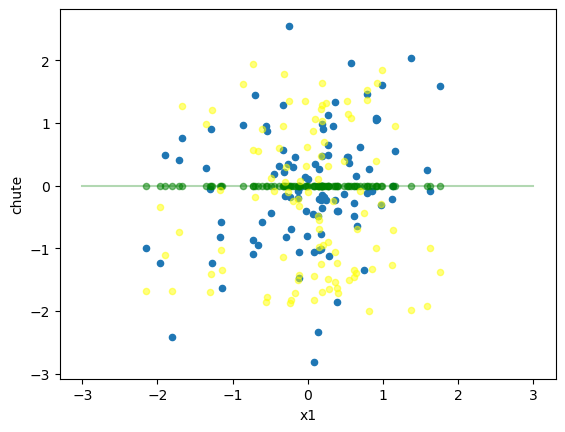

In [74]:
ax1 = df_pre.plot(kind='scatter', x='x1', y='x2')
ax2 = df_pre.plot(kind='scatter', x='x1', y='media', c='green', alpha=.5, ax=ax1)
ax3 = df_pre.plot(kind='scatter', x='x1', y='chute', c='yellow', alpha=.5, ax=ax1)
# linha da média
plt.plot([-3, 3], [0, 0], color='green', alpha=.3, linestyle='-')

In [75]:
mse_chute = mean_squared_error(df_pre['x2'], df_pre['chute'])
mse_media = mean_squared_error(df_pre['x2'], df_pre['media'])
print("Erro quadrado médio do chute: ", mse_chute)
print("Erro quadrado médio da média: ", mse_media)

Erro quadrado médio do chute:  1.8759965391837423
Erro quadrado médio da média:  0.9060853880613513


## Criando o exemplo em código
Iniciamos com a importação das bibliotecas. As bibliotecas `pandas`, `numpy` e `matplotlib` são usados na grande maioria das tarefas de ML quando utilizamos a linguagem Python, portanto, aprender a utilizar essas bibliotecas é fundamental.
> Uma tarefa importante no estudo de machine learning é a criação de exemplos, tanto dos dados, quanto dos algoritmos. Ser capaz de construir um conjunto ficcional de dados é importante para a demonstração de técnicas de implementação, e construir os algoritmos a partir do zero é importante para desenvolver a intuição por trás dos algoritmos.

In [76]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import tree # implementação de árvore de decisão do sklearn

In [77]:
# Usando a distribuição normal para gerar dados aleatórios
velocidade = np.random.normal(14, 1.5, 100)
resistencia = np.random.normal(6180, 500, 100)
potencia = np.random.normal(70, 15, 100)
df = pd.DataFrame({'velocidade': velocidade, 'resistencia': resistencia, 'potencia': potencia})
df.head()

,velocidade,resistencia,potencia
0,12.336725,5789.214046,56.014965
1,13.326145,6675.593091,37.071710
2,12.804115,6912.052298,102.214015
3,15.124060,6094.445070,72.814647
4,16.862986,6445.329346,64.979881


In [78]:
print(df.describe())

       velocidade  resistencia    potencia
count  100.000000   100.000000  100.000000
mean    14.050563  6185.724966   68.238177
std      1.523580   528.205191   12.905560
min      9.245834  4970.403086   30.755319
25%     13.054222  5754.416535   60.724795
50%     14.014303  6182.535359   69.113020
75%     14.795049  6519.762425   76.025926
max     17.837622  7721.264572  102.214015


Para criar a etiqueta dos dados, adicionamos uma nova coluna chamada `aptidao`, e fazemos a anotação manual de cada observação.

> Para este exemplo os dados serão pseudo-anotados, mas em um contexto de negócios real de negócio, outras técnicas são empregadas para realizar a anotação, como a anotação por um especialista de domínio, uma rede neural, ou um algoritmo não-supervisionado.

Como a magnitude das variáveis é muito diferente, normalizamos os dados

In [79]:
# normalizando os dados
normal_df = (df-df.mean())/df.std()

# mapeando os resultados com uma categoria de esporte
dict_map = {
    "velocidade": "atletismo",
    "resistencia": "futebol",
    "potencia": "fisiculturismo"
}

# criando a etiqueta
df['aptidao'] = normal_df.idxmax(axis=1).map(dict_map)
normal_df.head()

,velocidade,resistencia,potencia
0,-1.124876,-0.750676,-0.947128
1,-0.475471,0.927420,-2.414964
2,-0.818105,1.375086,2.632651
3,0.704588,-0.172811,0.354612
4,1.845931,0.491484,-0.252472


## Aplicando ML para prever os resultados - Árvore de Decisão

Agora que já tratamos os nossos dados fictícios, podemos aplicar um algoritmo de ML real para comparar com os resultados obtidos através de chutes e através da simples média. Aqui vamos usar a árvore de decisão implementada na biblioteca `sklearn`.

As árvores de decisão são modelos da família CART (Classification And Regression Trees), e, como o nome diz, podem ser usadas tanto para tarefas de regressão quanto para tarefas de classificação.

> Pergunta rápida: Estamos diante de uma tarefa de classificação ou de regressão?

In [80]:
from sklearn.model_selection import train_test_split

# Fazendo o split entre base de treino e base de teste
y_train, y_test = train_test_split(df, test_size=.25)
resultado_original = y_test['aptidao']
y_test.drop("aptidao", axis=1, inplace=True)

# Criando o objeto classificador
clf = tree.DecisionTreeClassifier()

# Ajustando o modelo aos dados
clf = clf.fit(y_train[['velocidade', 'resistencia', 'potencia']], y_train['aptidao'])

# Fazendo a previsão
y_pred = clf.predict(y_test)
y_test['resultado_original'] = resultado_original
y_test['predicao_dt'] = y_pred
y_test.head()

,velocidade,resistencia,potencia,resultado_original,predicao_dt
71,14.471948,5048.032427,71.222781,atletismo,fisiculturismo
17,12.611964,5202.406399,85.728501,fisiculturismo,fisiculturismo
43,13.952760,6907.542492,70.859525,futebol,futebol
27,12.165998,5732.618203,90.156502,fisiculturismo,fisiculturismo
48,14.629362,6381.053212,60.009874,atletismo,futebol


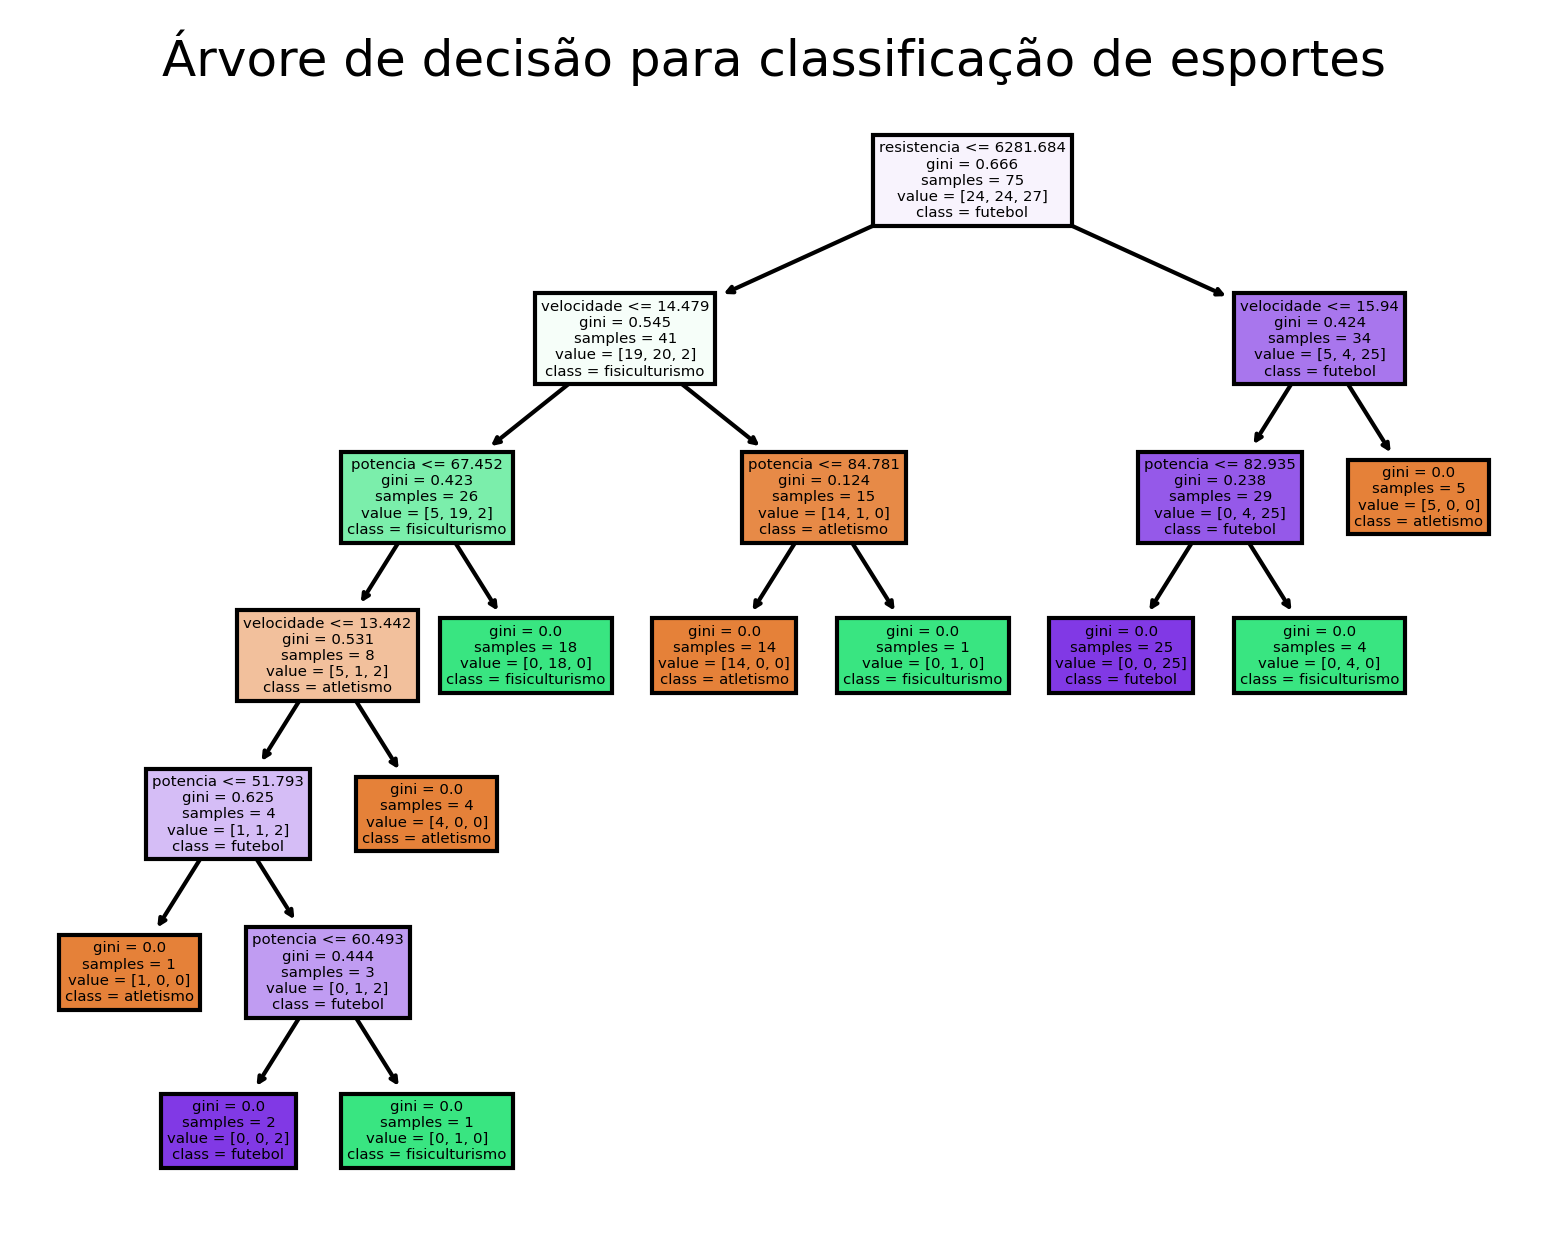

In [81]:
# visualização da árvore
plt.figure(dpi=300)
tree.plot_tree(clf, class_names=y_test.resultado_original.unique(), feature_names=y_test.columns[:-2], filled=True)
plt.title("Árvore de decisão para classificação de esportes")
plt.show()

Podemos comparar o nosso modelo com o Zero Rule Algorithm (ZeroR - escolhe a categoria mais frequente), e um modelo de escolha aleatória. No código abaixo criamos essas "predições".

In [82]:
y_test['ZeroR'] = y_train.aptidao.value_counts().idxmax()
y_test['chute'] = np.random.choice(["futebol", "fisiculturismo", "atletismo"], len(y_test))
y_test.head()

,velocidade,resistencia,potencia,resultado_original,predicao_dt,ZeroR,chute
71,14.471948,5048.032427,71.222781,atletismo,fisiculturismo,futebol,fisiculturismo
17,12.611964,5202.406399,85.728501,fisiculturismo,fisiculturismo,futebol,fisiculturismo
43,13.952760,6907.542492,70.859525,futebol,futebol,futebol,futebol
27,12.165998,5732.618203,90.156502,fisiculturismo,fisiculturismo,futebol,atletismo
48,14.629362,6381.053212,60.009874,atletismo,futebol,futebol,atletismo


In [83]:
from sklearn import metrics

# Mostrando a precisão do modelo
print("Precisão (Decision Tree):", metrics.accuracy_score(y_test.resultado_original, y_test.predicao_dt))
print("Precisão (ZeroR):", metrics.accuracy_score(y_test.resultado_original, y_test.ZeroR))
print("Precisão (Chute):", metrics.accuracy_score(y_test.resultado_original, y_test.chute))

Precisão (Decision Tree): 0.84
Precisão (ZeroR): 0.32
Precisão (Chute): 0.44


## Implementando o algoritmo manualmente
A estrutura de dados que melhor representa o algorimo é uma árvore binária. Na raiz da árvore temos todas as observações, e a cada nódulo, chamados de nódulos de decisão, os dados são divididos, com o objetivo de encontrar uma árvore onde cada folha contenha uma subdivisão _pura_ dos dados, quer dizer, numa tarefa de classificação, uma folha conterá um grupo onde todas as observações vão pertencer a mesma categoria.

### Definindo os valores de corte - Índice GINI
O objetivo principal do algoritmo é aprender com um conjunto de treinamento quais são as _regras de decisão_ que geram a árvore desejada. O método mais utilizado para calcular o valor de corte é o Índice GINI, que é derivado do conceito de entropia.

A entropia, em teoria da informação, é uma medida de impureza de uma amostra, cujos valores calculados variam entre 0 e 1. Em um grupo dividido em duas classes, caso metade das observações pertença a uma classe, e a outra metade pertença a outra classe, a entropia vai medir o maior valor, 1, uma vez que o grupo é o mais heterogêneo possível. Caso todas as amostrar pertençam a uma mesma classe, a entropia vai ser 0, uma vez que o grupo é totalmente homogêneo, ou puro.

A entropia é calculada através da seguinte fórmula:
$$Entropia(S)=-\sum_{c \in C}p(c)log_2p(c)$$
Onde:
* $S$ é o conjunto de dados
* $c$ é uma classe pertencente ao conjunto de dados
* $p(c)$ é a proporção de observações no conjunto de dados $S$ que pertence à classe $c$.

Para as árvores de decisão, cada regra de decisão vai ser aplicada com base na variável que apresente o menor valor de entropia. Para chegar a essa conclusão, calculamos o _ganho de informação_ gerado pela divisão, que é a diferença na entropia antes e depois da divisão. Esse procedimento pode ser descrito pela seguinte fórmula:
$$\text{Ganho de Informação}(S,a) = Entropia(S) - \sum_{v \in valores(a)}\frac{|S_v|}{|S|}Entropia(S_v)$$
Onde:
* $a$ é um atributo ou classe
* $Entropia(S)$ é a entropia do conjunto de dados total
* $\frac{|S_v|}{|S|}$ é a proporção dos valores de $S_v$ em relação a $S$
* $Entropia(S_v)$ é a entropia do conjunto de dados $S_v$

Como trabalhamos com variáveis preditoras contínuas...